In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

In [2]:
# Load the ASHRAE CSV file
file_path = "fe_simplified_ashrae_data.csv"
df = pd.read_csv(file_path)
df.head()

,year,year_delta,age,sex,thermal_sensation,thermal_comfort,clothing_insulation,metabolic_rate,air_temperature,relative_humidity,...,koppen_climate_Cwb,koppen_climate_Dfb,koppen_climate_Dwa,building_type_Multifamily housing,building_type_Office,building_type_Others,building_type_Senior center,cooling_strategy_Mechanically Ventilated,cooling_strategy_Mixed Mode,cooling_strategy_Naturally Ventilated
0,2000.0,18.0,-1.704718,0,-0.529958,0.210249,-1.587887,-0.045071,-0.06435,0.287875,...,False,False,False,False,False,False,False,False,False,False
1,2000.0,18.0,-1.704718,0,-1.843510,0.210249,-1.587887,-0.045071,-0.06435,0.287875,...,False,False,False,False,False,False,False,False,False,False
2,2000.0,18.0,-1.704718,1,0.291013,1.679869,-1.515120,-0.045071,-0.06435,0.287875,...,False,False,False,False,False,False,False,False,False,False
3,2000.0,18.0,-1.809676,0,-2.171898,-1.259372,-1.660654,-0.045071,-0.06435,0.287875,...,False,False,False,False,False,False,False,False,False,False
4,2000.0,18.0,-1.704718,1,-0.529958,1.679869,-1.260434,-0.045071,-0.06435,0.287875,...,False,False,False,False,False,False,False,False,False,False


In [3]:
# Define features (X) and target (y)
X = df.drop(columns=["thermal_preference"])
y = df["thermal_preference"]

In [4]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train Set Shape:", X_train.shape, "Test Set Shape:", X_test.shape)

Train Set Shape: (68400, 66) Test Set Shape: (17100, 66)


In [5]:
# Stratified sampling to take 10% of the training data
X_sample, _, y_sample, _ = train_test_split(
    X_train, y_train, train_size=0.1, random_state=42, stratify=y_train
)
print(
    "Sampled Train Set Shape:", X_sample.shape, "Sampled Target Shape:", y_sample.shape
)

Sampled Train Set Shape: (6840, 66) Sampled Target Shape: (6840,)


c:\Users\sakif\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sakif\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

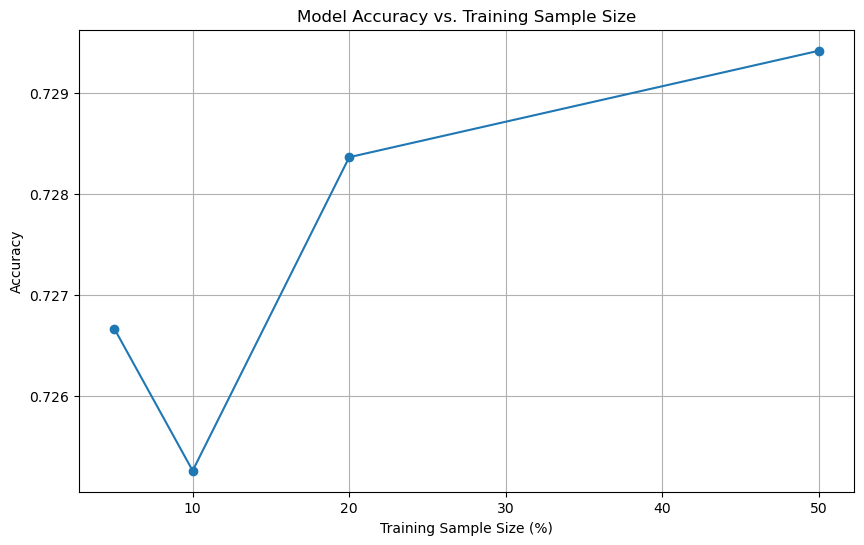

In [6]:
sample_sizes = [0.05, 0.1, 0.2, 0.5]  # Proportions of the dataset
accuracies = []

for size in sample_sizes:
    # Take a stratified sample
    X_sample, _, y_sample, _ = train_test_split(
        X_train, y_train, train_size=size, random_state=42, stratify=y_train
    )

    # Train a Logistic Regression model
    model = LogisticRegression(
        max_iter=1000, random_state=42, multi_class="multinomial"
    )
    model.fit(X_sample, y_sample)

    # Evaluate on the full test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot Accuracy vs. Sample Size
plt.figure(figsize=(10, 6))
plt.plot(np.array(sample_sizes) * 100, accuracies, marker="o")
plt.title("Model Accuracy vs. Training Sample Size")
plt.xlabel("Training Sample Size (%)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Scale the data and fit logistic regression in a pipeline
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),  # Normalize the data
        (
            "log_reg",
            LogisticRegression(
                max_iter=2000, random_state=42, multi_class="multinomial", solver="saga"
            ),
        ),
    ]
)

# Perform cross-validation on a smaller sample
X_sample, _, y_sample, _ = train_test_split(
    X_train, y_train, train_size=0.1, random_state=42, stratify=y_train
)

# StratifiedKFold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X_sample, y_sample, cv=cv, scoring="accuracy")

# Display results
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.72807018 0.72149123 0.74049708 0.72368421 0.72295322]
Mean Cross-Validation Accuracy: 0.7273391812865497


In [8]:
# Train the model on the sampled data
final_model = LogisticRegression(
    max_iter=1000, random_state=42, multi_class="multinomial"
)
final_model.fit(X_sample, y_sample)

# Predict on the test set
y_pred_final = final_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_final))
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_final))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.65      0.71      5419
           1       0.70      0.87      0.78      8688
           2       0.76      0.44      0.55      2993

    accuracy                           0.73     17100
   macro avg       0.74      0.65      0.68     17100
weighted avg       0.73      0.73      0.72     17100

Accuracy on Test Set: 0.7252631578947368


c:\Users\sakif\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Logistic Regression

c:\Users\sakif\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.65      0.71      5419
           1       0.70      0.87      0.78      8688
           2       0.77      0.44      0.56      2993

    accuracy                           0.73     17100
   macro avg       0.75      0.66      0.68     17100
weighted avg       0.74      0.73      0.72     17100

Accuracy: 0.7283625730994152


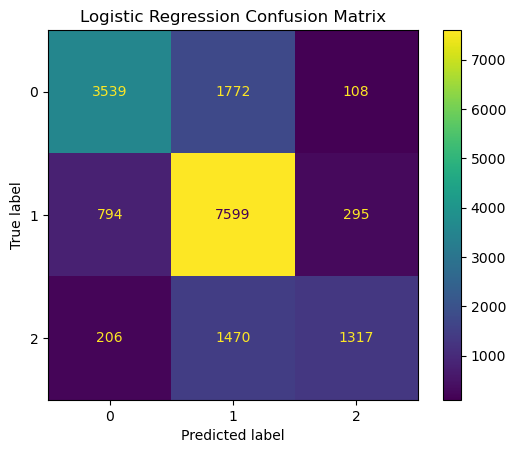

In [9]:
# Initialize the logistic regression model
log_reg_model = LogisticRegression(
    random_state=42, max_iter=1000, multi_class="multinomial"
)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print(
    "Logistic Regression Classification Report:\n",
    classification_report(y_test, y_pred),
)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg_model.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=log_reg_model.classes_
)
disp.plot(cmap="viridis")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# RANDOM FOREST

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      5419
           1       0.79      0.83      0.81      8688
           2       0.79      0.66      0.72      2993

    accuracy                           0.79     17100
   macro avg       0.79      0.76      0.78     17100
weighted avg       0.79      0.79      0.79     17100

Accuracy: 0.7911111111111111


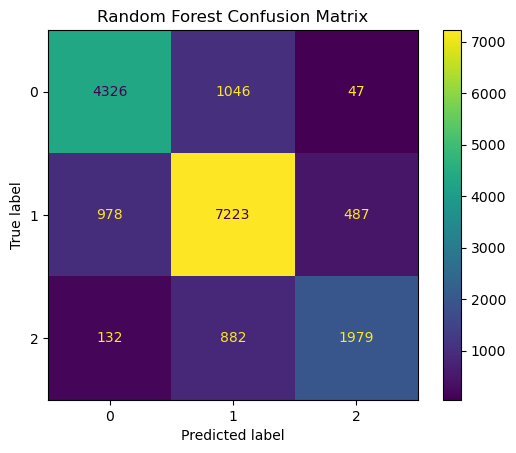

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="viridis")
plt.title("Random Forest Confusion Matrix")
plt.show()

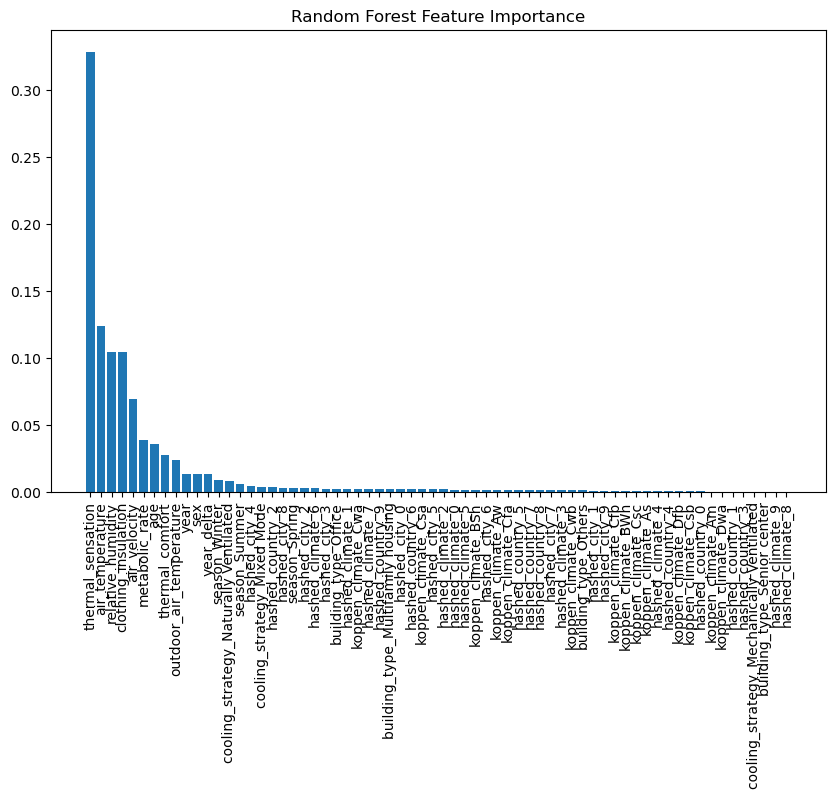

In [11]:
# Get feature importance
import pandas as pd
import matplotlib.pyplot as plt

rf_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": rf_importances}
).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.title("Random Forest Feature Importance")
plt.xticks(rotation=90)
plt.show()

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      5419
           1       0.79      0.83      0.81      8688
           2       0.79      0.66      0.72      2993

    accuracy                           0.79     17100
   macro avg       0.79      0.76      0.78     17100
weighted avg       0.79      0.79      0.79     17100

Random Forest Accuracy: 0.7911111111111111


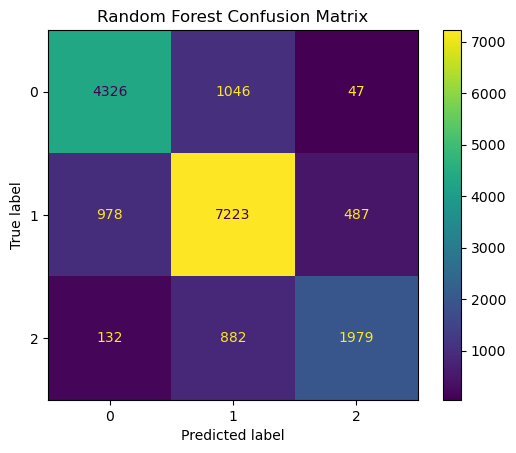

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(
    "Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf)
)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Plot confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)
disp_rf = ConfusionMatrixDisplay(
    confusion_matrix=cm_rf, display_labels=rf_model.classes_
)
disp_rf.plot(cmap="viridis")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
rf_param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees
    "max_depth": [None, 10, 20, 30],  # Maximum depth of the trees
    "min_samples_split": [2, 5, 10],  # Minimum samples to split a node
    "min_samples_leaf": [1, 2, 4],  # Minimum samples to be a leaf node
    "bootstrap": [True, False],  # Use bootstrap sampling
}

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=20,  # Number of parameter combinations to try
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,
)

# Fit the model
rf_random.fit(X_sample, y_sample)

# Print the best parameters and best score
print("Best Parameters (Random Forest):", rf_random.best_params_)
print("Best Cross-Validation Score:", rf_random.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters (Random Forest): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}
Best Cross-Validation Score: 0.756140350877193


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      5419
           1       0.78      0.85      0.81      8688
           2       0.82      0.63      0.71      2993

    accuracy                           0.79     17100
   macro avg       0.80      0.76      0.77     17100
weighted avg       0.79      0.79      0.79     17100

Random Forest Accuracy: 0.7930994152046784


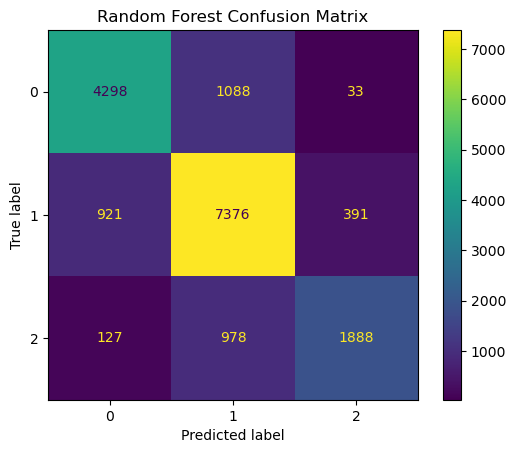

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=2,
    max_depth=20,
    bootstrap=True,
)
# {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(
    "Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf)
)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Plot confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)
disp_rf = ConfusionMatrixDisplay(
    confusion_matrix=cm_rf, display_labels=rf_model.classes_
)
disp_rf.plot(cmap="viridis")
plt.title("Random Forest Confusion Matrix")
plt.show()

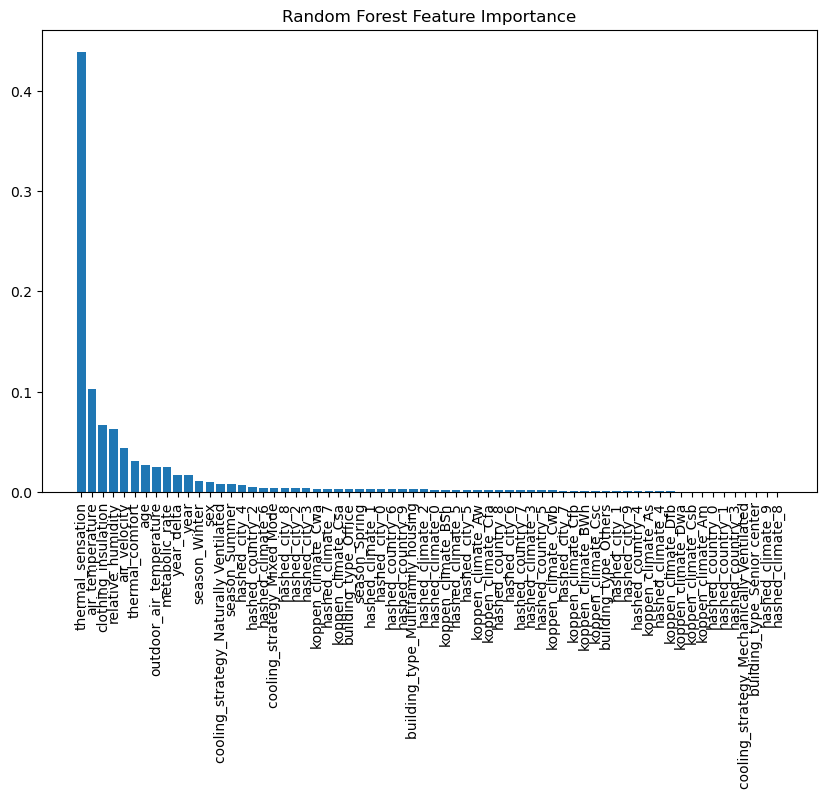

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
rf_importances = rf_model.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": rf_importances}
).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.title("Random Forest Feature Importance")
plt.xticks(rotation=90)
plt.show()

In [15]:
feature_importance_df

,Feature,Importance
4,thermal_sensation,0.438809
8,air_temperature,0.102503
6,clothing_insulation,0.066961
9,relative_humidity,0.063133
10,air_velocity,0.044006
...,...,...
15,hashed_country_3,0.000251
63,cooling_strategy_Mechanically Ventilated,0.000132
62,building_type_Senior center,0.000123
41,hashed_climate_9,0.000000


In [16]:
# Get feature importance from a trained Random Forest model
rf_importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": rf_importances}
).sort_values(by="Importance", ascending=False)

# Display feature importance
print("Feature Importance:\n", feature_importance_df)

Feature Importance:
                                      Feature  Importance
4                          thermal_sensation    0.438809
8                            air_temperature    0.102503
6                        clothing_insulation    0.066961
9                          relative_humidity    0.063133
10                              air_velocity    0.044006
..                                       ...         ...
15                          hashed_country_3    0.000251
63  cooling_strategy_Mechanically Ventilated    0.000132
62               building_type_Senior center    0.000123
41                          hashed_climate_9    0.000000
40                          hashed_climate_8    0.000000

[66 rows x 2 columns]


In [17]:
# Define a threshold for dropping less important features
threshold = 0.01  # Example: Drop features with importance < 1%

# Identify less important features
less_important_features = feature_importance_df[
    feature_importance_df["Importance"] < threshold
]["Feature"].tolist()

# Display less important features
print("Features to Drop:", less_important_features)

Features to Drop: ['sex', 'cooling_strategy_Naturally Ventilated', 'season_Summer', 'hashed_city_4', 'hashed_country_2', 'hashed_climate_6', 'cooling_strategy_Mixed Mode', 'hashed_city_8', 'hashed_city_2', 'hashed_city_3', 'koppen_climate_Cwa', 'hashed_climate_7', 'koppen_climate_Csa', 'building_type_Office', 'season_Spring', 'hashed_climate_1', 'hashed_city_0', 'hashed_country_6', 'hashed_country_9', 'building_type_Multifamily housing', 'hashed_climate_2', 'hashed_climate_0', 'koppen_climate_BSh', 'hashed_climate_5', 'hashed_city_5', 'koppen_climate_Aw', 'koppen_climate_Cfa', 'hashed_country_8', 'hashed_city_6', 'hashed_country_7', 'hashed_climate_3', 'hashed_country_5', 'koppen_climate_Cwb', 'hashed_city_7', 'koppen_climate_Cfb', 'koppen_climate_BWh', 'koppen_climate_Csc', 'building_type_Others', 'hashed_city_1', 'hashed_city_9', 'hashed_country_4', 'koppen_climate_As', 'hashed_climate_4', 'koppen_climate_Dfb', 'koppen_climate_Dwa', 'koppen_climate_Csb', 'koppen_climate_Am', 'hashed_

In [18]:
# Drop less important features from training and test datasets
X_train_dropped = X_train.drop(columns=less_important_features)
X_test_dropped = X_test.drop(columns=less_important_features)

# Display the updated shapes
print("Updated Train Set Shape:", X_train_dropped.shape)
print("Updated Test Set Shape:", X_test_dropped.shape)

Updated Train Set Shape: (68400, 12)
Updated Test Set Shape: (17100, 12)


In [19]:
# Train a new Random Forest model with reduced features
rf_model_reduced = RandomForestClassifier(random_state=42)
rf_model_reduced.fit(X_train_dropped, y_train)

# Make predictions and evaluate
y_pred_reduced = rf_model_reduced.predict(X_test_dropped)
print("Accuracy After Dropping Features:", accuracy_score(y_test, y_pred_reduced))

Accuracy After Dropping Features: 0.785906432748538


# Gradient Boosting

### XGBoost

In [20]:
import sys
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install lightgbm
!{sys.executable} -m pip install catboost

c:\Users\sakif\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:51:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      5419
           1       0.78      0.83      0.80      8688
           2       0.78      0.67      0.72      2993

    accuracy                           0.79     17100
   macro avg       0.79      0.76      0.77     17100
weighted avg       0.79      0.79      0.79     17100

XGBoost Accuracy: 0.7863157894736842


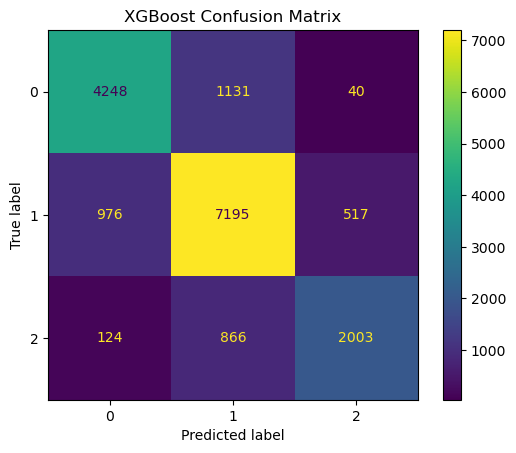

In [21]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    random_state=42, use_label_encoder=False, eval_metric="mlogloss"
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Plot confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=xgb_model.classes_)
disp_xgb = ConfusionMatrixDisplay(
    confusion_matrix=cm_xgb, display_labels=xgb_model.classes_
)
disp_xgb.plot(cmap="viridis")
plt.title("XGBoost Confusion Matrix")
plt.show()

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
xgb_param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 6, 10],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "subsample": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2],
    "reg_alpha": [0, 0.01, 0.1],  # L1 regularization
    "reg_lambda": [1, 1.5, 2],  # L2 regularization
}

# Initialize RandomizedSearchCV
xgb_random = RandomizedSearchCV(
    estimator=XGBClassifier(
        random_state=42, use_label_encoder=False, eval_metric="mlogloss"
    ),
    param_distributions=xgb_param_grid,
    n_iter=20,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
)

# Fit the model
xgb_random.fit(X_sample, y_sample)

# Print the best parameters and best score
print("Best Parameters (XGBoost):", xgb_random.best_params_)
print("Best Cross-Validation Score:", xgb_random.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\sakif\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:51:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters (XGBoost): {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.6}
Best Cross-Validation Score: 0.7614035087719299


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1642
[LightGBM] [Info] Number of data points in the train set: 68400, number of used features: 64
[LightGBM] [Info] Start training from score -1.149259
[LightGBM] [Info] Start training from score -0.677107
[LightGBM] [Info] Start training from score -1.742719
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      5419
           1       0.78      0.83      0.80      8688
           2       0.78      0.67      0.72      2993

    accuracy                           0.79     17100
   macro avg       0.79      0.76      0.77     17100
weighted avg       0.79      0.79      0.78   

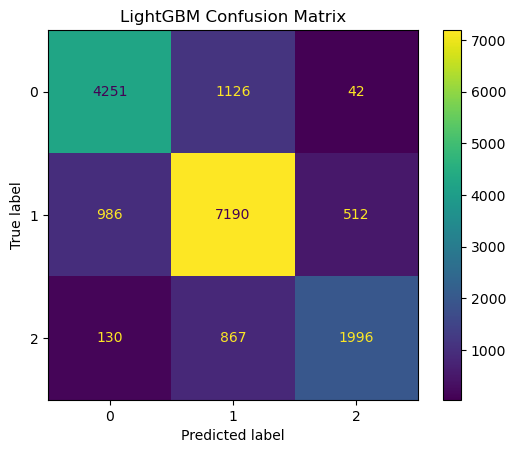

In [23]:
from lightgbm import LGBMClassifier

# Initialize the LightGBM model
lgbm_model = LGBMClassifier(random_state=42)

# Train the model
lgbm_model.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate the model
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgbm))
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))

# Plot confusion matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm, labels=lgbm_model.classes_)
disp_lgbm = ConfusionMatrixDisplay(
    confusion_matrix=cm_lgbm, display_labels=lgbm_model.classes_
)
disp_lgbm.plot(cmap="viridis")
plt.title("LightGBM Confusion Matrix")
plt.show()

CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      5419
           1       0.79      0.83      0.81      8688
           2       0.78      0.67      0.72      2993

    accuracy                           0.79     17100
   macro avg       0.79      0.76      0.77     17100
weighted avg       0.79      0.79      0.79     17100

CatBoost Accuracy: 0.7864912280701755


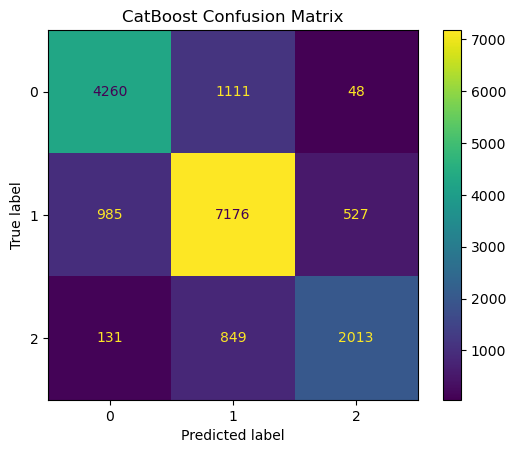

In [24]:
from catboost import CatBoostClassifier

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=0)

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the model
print(
    "CatBoost Classification Report:\n", classification_report(y_test, y_pred_catboost)
)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_catboost))

# Plot confusion matrix
cm_catboost = confusion_matrix(y_test, y_pred_catboost, labels=catboost_model.classes_)
disp_catboost = ConfusionMatrixDisplay(
    confusion_matrix=cm_catboost, display_labels=catboost_model.classes_
)
disp_catboost.plot(cmap="viridis")
plt.title("CatBoost Confusion Matrix")
plt.show()

In [27]:
# Train Random Forest with the best parameters
best_rf_model = RandomForestClassifier(**rf_random.best_params_, random_state=42)
best_rf_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred_rf = best_rf_model.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Test Accuracy: 0.7930994152046784


In [28]:
# Train XGBoost with the best parameters
best_xgb_model = XGBClassifier(
    **xgb_random.best_params_,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)
best_xgb_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred_xgb = best_xgb_model.predict(X_test)
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_pred_xgb))

c:\Users\sakif\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:53:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Test Accuracy: 0.7911111111111111


In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM model
svm_model = SVC(kernel="rbf", random_state=42)

# Train the model on sampled data
svm_model.fit(X_sample, y_sample)

# Predict on test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      5419
           1       0.51      1.00      0.67      8688
           2       0.00      0.00      0.00      2993

    accuracy                           0.51     17100
   macro avg       0.17      0.33      0.22     17100
weighted avg       0.26      0.51      0.34     17100

SVM Accuracy: 0.5080701754385964


c:\Users\sakif\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sakif\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sakif\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on sampled data
knn_model.fit(X_sample, y_sample)

# Predict on test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69      5419
           1       0.70      0.79      0.74      8688
           2       0.74      0.46      0.56      2993

    accuracy                           0.70     17100
   macro avg       0.71      0.64      0.66     17100
weighted avg       0.70      0.70      0.69     17100

KNN Accuracy: 0.6984795321637427


In [31]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)

# Train the model on sampled data
mlp_model.fit(X_sample, y_sample)

# Predict on test data
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))

MLP Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.94      0.63      5419
           1       0.58      0.43      0.49      8688
           2       0.88      0.02      0.04      2993

    accuracy                           0.52     17100
   macro avg       0.65      0.46      0.39     17100
weighted avg       0.60      0.52      0.46     17100

MLP Accuracy: 0.5176023391812865


In [32]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model on sampled data
nb_model.fit(X_sample, y_sample)

# Predict on test data
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.56      0.54      5419
           1       0.69      0.27      0.39      8688
           2       0.27      0.71      0.39      2993

    accuracy                           0.44     17100
   macro avg       0.49      0.51      0.44     17100
weighted avg       0.56      0.44      0.44     17100

Naive Bayes Accuracy: 0.4387719298245614


In [33]:
from catboost import CatBoostClassifier

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=0)

# Train the model on sampled data
catboost_model.fit(X_sample, y_sample)

# Predict on test data
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the model
print(
    "CatBoost Classification Report:\n", classification_report(y_test, y_pred_catboost)
)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_catboost))

CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      5419
           1       0.77      0.80      0.78      8688
           2       0.72      0.63      0.68      2993

    accuracy                           0.76     17100
   macro avg       0.75      0.73      0.74     17100
weighted avg       0.76      0.76      0.76     17100

CatBoost Accuracy: 0.7602923976608187


In [34]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with Elastic Net
elastic_net_model = LogisticRegression(
    penalty="elasticnet", solver="saga", l1_ratio=0.5, max_iter=1000, random_state=42
)

# Train the model on sampled data
elastic_net_model.fit(X_sample, y_sample)

# Predict on test data
y_pred_elastic = elastic_net_model.predict(X_test)

# Evaluate the model
print(
    "Elastic Net Classification Report:\n",
    classification_report(y_test, y_pred_elastic),
)
print("Elastic Net Accuracy:", accuracy_score(y_test, y_pred_elastic))

Elastic Net Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.56      0.65      5419
           1       0.62      0.92      0.74      8688
           2       0.88      0.12      0.21      2993

    accuracy                           0.67     17100
   macro avg       0.76      0.53      0.53     17100
weighted avg       0.72      0.67      0.62     17100

Elastic Net Accuracy: 0.6653801169590643


c:\Users\sakif\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [35]:
# Dictionary to store model names and accuracies
model_accuracies = {
    "SVM": accuracy_score(y_test, y_pred_svm),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "MLP": accuracy_score(y_test, y_pred_mlp),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "CatBoost": accuracy_score(y_test, y_pred_catboost),
    "Elastic Net": accuracy_score(y_test, y_pred_elastic),
}

# Display results
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")

SVM: 0.5081
KNN: 0.6985
MLP: 0.5176
Naive Bayes: 0.4388
CatBoost: 0.7603
Elastic Net: 0.6654


In [36]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[("rf", rf_model), ("xgb", xgb_model), ("cat", catboost_model)],
    voting="soft",
)

ensemble_model.fit(X_train, y_train)
ensemble_accuracy = ensemble_model.score(X_test, y_test)
print("Ensemble Model Accuracy:", ensemble_accuracy)

c:\Users\sakif\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:54:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Accuracy: 0.7901169590643274
